In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
import os
os.getcwd()
lab_path='/content/drive/MyDrive/Github/Yikun-Bai/Sliced Optimal Partial Transport/Code/sopt'
os.chdir(lab_path)


In [3]:
pip install POT

     |████████████████████████████████| 664 kB 14.9 MB/s eta 0:00:01


In [7]:
import torch
import numpy as np 
import sys
from opt import *
from library import *
import ot 
import matplotlib.pyplot as plt
import time

In [ ]:
Lambda=8
time1_list=[]
time2_list=[]
time3_list=[]
time4_list=[]
time5_list=[]

start_n=10
end_n=1000

step=10
k=3
for n in range (start_n,end_n,step):
    m=n+10
    mu=np.ones(n)
    nu=np.ones(m)
    time1=0
    time2=0
    time3=0
    time4=0
    time5=0
    for i in range (k):
        X=np.random.uniform(0,20,size=n)
        Y=np.random.uniform(5,30,size=m)
        
   
        start_time = time.time()
        X.sort()
        Y.sort()    
#        cost1,L1=opt_1d_v1(X,Y,Lambda)
#        end_time = time.time()
        time1+=end_time-start_time 
    
        
        start_time = time.time()
        X.sort()
        Y.sort()    
        cost2,L2=opt_1d_v2(X,Y,Lambda)
        end_time = time.time()
        time2+=end_time-start_time
    
        start_time = time.time()
        X.sort()
        Y.sort()    
        cost3,L3=pot_1d(X,Y)
        end_time = time.time()
        time3+=end_time-start_time
    
        L_y=[j for j in L2 if j>=0]
        start_time = time.time()
        M=cost_matrix(X,Y)
        L4=ot.partial.entropic_partial_wasserstein(mu,nu,M,len(L_y))
        end_time = time.time()
        time4+=end_time-start_time
    
    

    # start_time = time.time()
    # M=cost_matrix(X,Y)
    # L5=ot.partial.partial_wasserstein(mu,nu,M,len(L_y))
    # end_time = time.time()
    # time5=end_time-start_time
    
    
#    time1_list.append(time1/k)
    time2_list.append(time2/k)
    time3_list.append(time3/k)
    time4_list.append(time4/k)
    # time5_list.append(time5)

    
    


#plt.plot(range(start_n,end_n,step),time1_list,label='ours v1')


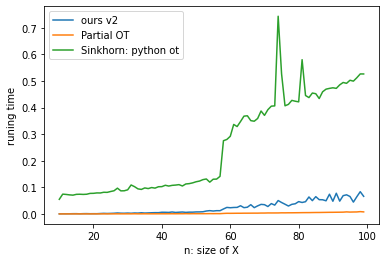

In [11]:
plt.plot(range(start_n,end_n,step),time2_list,label='ours v2')
plt.plot(range(start_n,end_n,step),time3_list,label='Partial OT')
plt.plot(range(start_n,end_n,step),time4_list,label='Sinkhorn: python ot')
#plt.plot(range(start_n,end_n,step),time5_list,label='LP: python ot')
plt.xlabel("n: size of X")
plt.ylabel("runing time")
plt.legend(loc='best')
plt.show()